#ТМО РК1 ИУ5-64Б Малютин Вариант 9
#Задача 2, датасет 1

##Задача №2.
Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака. Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали? Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

##Дополнительные требования по группам:
Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

Набор данных load_iris из библиотеки sklearn не содержит пропусков и все признаки являются количественными (длина и ширина лепестка, длина и ширина чашелистика) и относятся к одному из трех видов ирисов, что является категориальной целевой переменной flower_size.

##Загрузим набор данных и добавим как категориальный признак, так и пропуски в данные, чтобы в дальнейшем их обработать

In [48]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])

np.random.seed(0)
missing_values_count = 20
missing_indices = np.random.choice(df.shape[0], missing_values_count, replace=False)
df.loc[missing_indices, 'sepal length (cm)'] = np.nan
df['flower_size'] = pd.qcut(df['sepal length (cm)'].fillna(df['sepal length (cm)'].median() * df['sepal width (cm)'].median() + df['petal length (cm)'].median() * df['petal width (cm)'].median()), 4, labels=["small", "mid", "big", "large"])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_size  
0     0.0       small  
1     0.0       small  
2     0.0       small  
3     0.0       small  
4     0.0       small  


##Обработка пропусков
Для обработки пропусков в категориальном признаке flower_size мы можем использовать метод SimpleImputer с наиболее встречающимися.
Для категориальных признаков потребовалось закодировать их, заполнить закодированными значениями, а потом раскодировать.

In [49]:
label_encoder = LabelEncoder()
df['flower_size'] = label_encoder.fit_transform(df['flower_size'])

imputer = SimpleImputer(strategy='median')
df['sepal length (cm)'] = imputer.fit_transform(df[['sepal length (cm)']])

imputer_mode = SimpleImputer(strategy='most_frequent')
df['flower_size'] = imputer_mode.fit_transform(df[['flower_size']])

df['flower_size'] = label_encoder.inverse_transform(df['flower_size'].astype(int))
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_size  
0     0.0       small  
1     0.0       small  
2     0.0       small  
3     0.0       small  
4     0.0       small  


#Выбор признаков для построения моделей машинного обучения
При выборе признаков для построения моделей машинного обучения я бы сосредоточился на следующем:

  -Важность признака: Использование только тех признаков, которые имеют значимое влияние на целевую переменную. Это можно определить с помощью методов выбора признаков, таких как важность признаков в деревьях решений.

  -Отсутствие сильной корреляции: Избегание использования признаков, которые сильно коррелируют друг с другом, чтобы уменьшить мультиколлинеарность.

  -Обработанные признаки с пропусками: Признаки, для которых были эффективно обработаны пропуски, могут быть включены в модель, при условии, что они соответствуют другим критериям отбора.
  
Конкретные признаки для модели будут зависеть от результатов анализа важности признаков и их взаимосвязей с целевой переменной. Важно также провести дополнительный анализ данных, включая оценку распределения признаков и возможные преобразования признаков для улучшения модели.

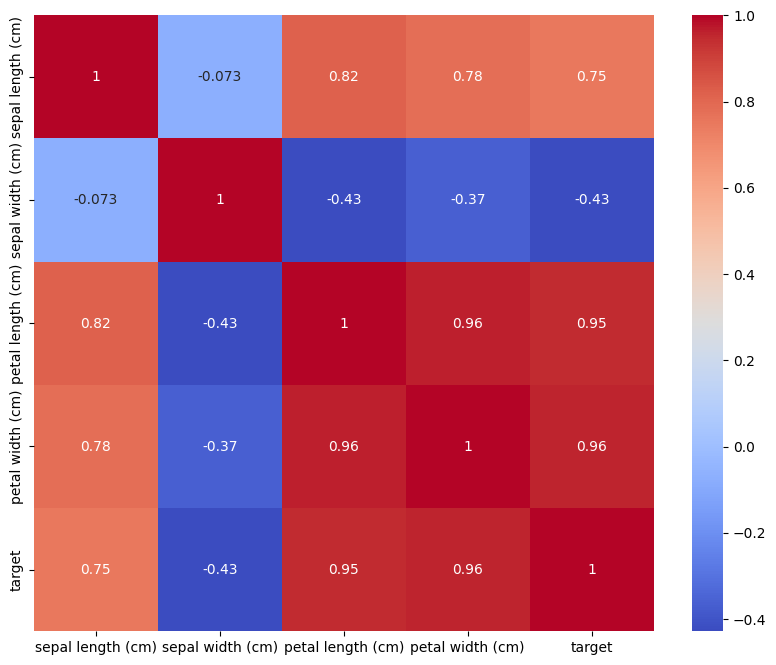

Важность признаков:
 1) sepal length (cm)              0.618000
 2) petal length (cm)              0.089333
 3) petal width (cm)               0.022667
 4) sepal width (cm)               0.021333
 5) target                         0.000000


In [50]:
y = df['flower_size']
X = df.drop(columns=['flower_size'])
X.columns = X.columns.astype(str)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

plt.figure(figsize=(10, 8))
corr = X_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

rf = RandomForestClassifier(random_state=42)
rf.fit(X_imputed, y)

result = permutation_importance(rf, X_imputed, y, n_repeats=10, random_state=42)
importances = result.importances_mean

indices = np.argsort(importances)[::-1]
print("Важность признаков:")
for f in range(X_imputed.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, X_imputed.columns[indices[f]], importances[indices[f]]))

###На основе анализа важности признаков и корреляции между ними, наибольшую важность имеет признак sepal length

#Для произвольной колонки данных построить график "Скрипичная диаграмма (violin plot)".

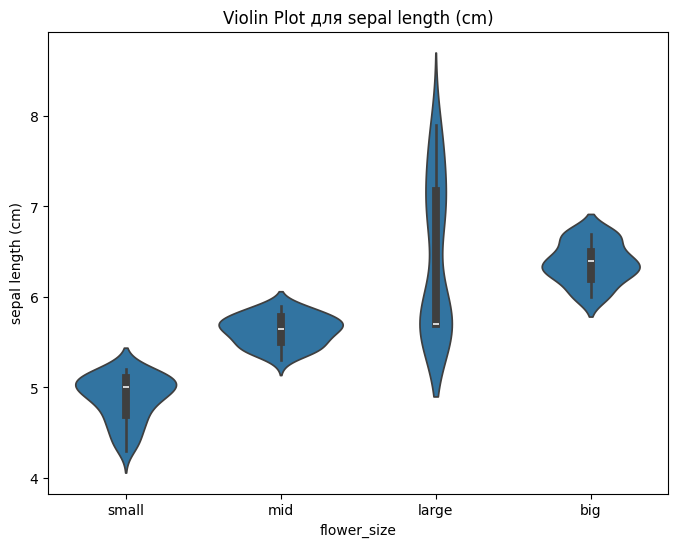

In [51]:
column = 'sepal length (cm)'

# Построение скрипичной диаграммы
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='flower_size', y=column, data=df, ax=ax)
ax.set_title(f'Violin Plot для {column}')
plt.show()

Я построил скрипичную диаграмму для выбранной колонки sepal length по категориальному признаку flower_size (обобщенный размер цветка). Диаграмма наглядно показывает распределение длины чашелистики по размеру самого цветка.